In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
import csv
import urllib.request
%matplotlib inline

import librosa
import numpy as np
import os
import librosa.display
import seaborn as sns

import IPython.display as ipd

In [2]:
# Opening dataset

df = pd.read_csv('bird_song_dataset.csv')
df.head()

,id,gen,sp,ssp,group,en,rec,cnt,loc,lat,...,rmk,bird-seen,animal-seen,playback-used,temp,regnr,auto,dvc,mic,smp
0,36065,Synallaxis,chinchipensis,NaN,birds,Chinchipe Spinetail,Frank Lambert,Peru,between Jaen and San Ignacio,NaN,...,This taxon is more usually called Chinchipe Sp...,unknown,unknown,unknown,NaN,NaN,no,NaN,NaN,44100
1,692727,Arremon,dorbignii,NaN,birds,Moss-backed Sparrow,Jacob Wijpkema,Bolivia,"Franz Tamayo, La Paz Department",-14.41850,...,"In Bolivia this is now called ""Moss-backed Spa...",yes,yes,no,NaN,NaN,no,NaN,NaN,44100
2,296852,Synallaxis,chinchipensis,NaN,birds,Chinchipe Spinetail,Ross Gallardy,Peru,"San Ignacio, Cajamarca",-5.49810,...,NaN,yes,yes,yes,NaN,NaN,no,NaN,NaN,44100
3,296851,Synallaxis,chinchipensis,NaN,birds,Chinchipe Spinetail,Ross Gallardy,Peru,"San Ignacio, Cajamarca",-5.49810,...,NaN,yes,yes,yes,NaN,NaN,no,NaN,NaN,44100
4,27768,Synallaxis,chinchipensis,NaN,birds,Chinchipe Spinetail,David Edwards,Peru,Chirinos,-5.24667,...,NaN,unknown,unknown,unknown,NaN,NaN,no,NaN,NaN,44100


* Performing Data Analysis

In [3]:
# check null columns
df.isnull()

,id,gen,sp,ssp,group,en,rec,cnt,loc,lat,...,rmk,bird-seen,animal-seen,playback-used,temp,regnr,auto,dvc,mic,smp
0,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,True,True,False,True,True,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,True,False,True,True,False
2,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,True,False,True,True,False
3,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,True,False,True,True,False
4,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,True,False,True,True,False
496,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,True,False,True,True,False
497,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,True,False,True,True,False
498,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,True,False,True,True,False


In [4]:
df['cnt'].unique()

array(['Peru', 'Bolivia', 'Argentina', 'Papua New Guinea', 'New Zealand',
       'Uruguay', 'Brazil', 'Paraguay', 'Australia', 'Indonesia',
       'Zambia', 'South Africa', 'Senegal', 'India', 'Thailand', 'China',
       'Mongolia', 'Russian Federation', 'South Korea', 'Japan',
       'Cambodia', 'United States', 'Ecuador', 'Colombia', 'Venezuela',
       'Costa Rica', 'Honduras', 'El Salvador', 'Nicaragua', 'Panama',
       'Mexico', 'Guatemala'], dtype=object)

In [5]:
df.columns

Index(['id', 'gen', 'sp', 'ssp', 'group', 'en', 'rec', 'cnt', 'loc', 'lat',
       'lng', 'alt', 'type', 'sex', 'stage', 'method', 'url', 'file',
       'file-name', 'sono', 'osci', 'lic', 'q', 'length', 'time', 'date',
       'uploaded', 'also', 'rmk', 'bird-seen', 'animal-seen', 'playback-used',
       'temp', 'regnr', 'auto', 'dvc', 'mic', 'smp'],
      dtype='object')

In [6]:
df['url'].isnull().sum()

0

In [7]:
df['type'].unique()

array(['call, song', 'song', 'call', 'rattle', 'duet, song', 'duet',
       'alarm (take off)', 'alarm call', 'song, song a',
       'call, flight call, call & flight call', 'fligth', '?',
       'flight call', 'flight call, water lapping',
       'flight call, caco frog', 'alarm call, call',
       'wings flapping sound', 'takeoff noise', 'wingbeats', 'call, duet',
       'canto', 'call, song, call and song', 'alarm call, alarm calls',
       'call, calls', 'call, alternate call', 'song?',
       'call, song, calls. song.', 'chorus', 'flock', 'call, ?',
       'dawn chorus', 'song, duet?', 'uncertain', 'call, allarm calls',
       'call, song, calls', 'call, aggression calls', 'alarm call?',
       'call, calls. wing whirrs.',
       'alarm call, alarm calls, wing sounds',
       'alarm call, agitated alarm calls', 'call, wing sound',
       'wing whirr', 'begging call', 'call, agitated calls',
       'call, contact calls',
       'call, song, contact calls and song by a pair', 'dawn 

# unique species

In [8]:
print("There are {:,} unique bird species in the dataset.".format(len(df['sp'].unique())))

There are 16 unique bird species in the dataset.


## Time of recording
📌Note: Majority of the data was registered between 2013 and 2019, during the months january upto december


In [9]:
# Create some time features by spliting the column for date
df['year'] = df['date'].apply(lambda x: x.split('-')[0])
df['month'] = df['date'].apply(lambda x: x.split('-')[1])
df['day_of_month'] = df['date'].apply(lambda x: x.split('-')[2])

In [10]:
df['month']

0      07
1      12
2      06
3      06
4      08
       ..
495    04
496    05
497    05
498    05
499    03
Name: month, Length: 500, dtype: object

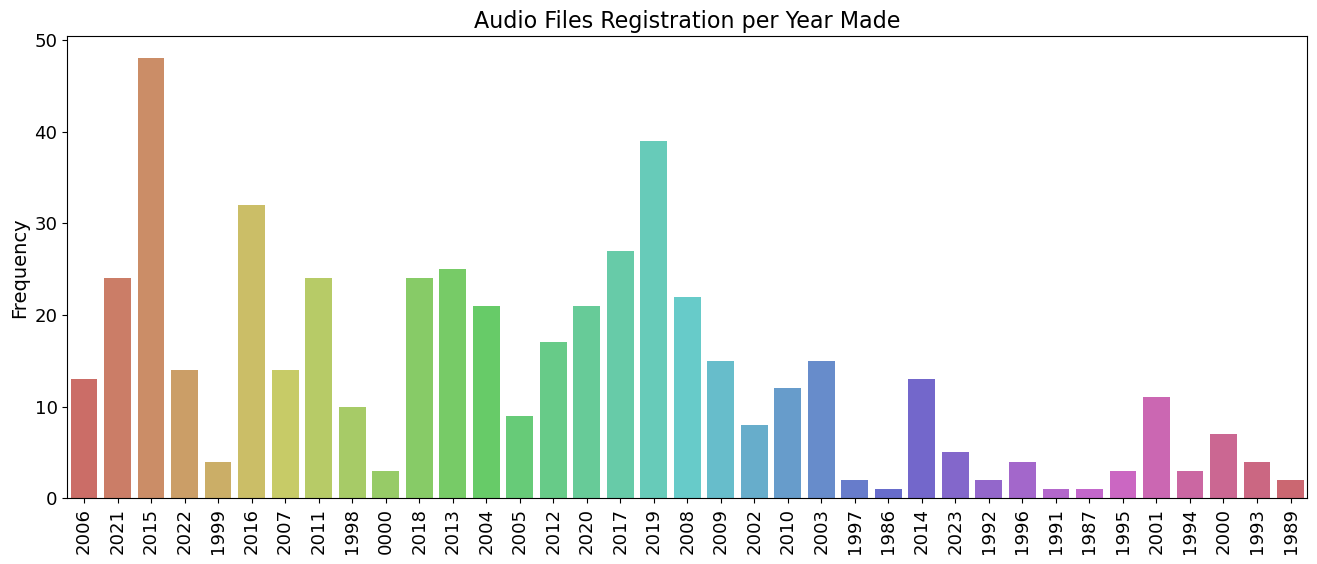

In [11]:
# crerate count plots for  audio files and the year they were created
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='year', palette="hls")

plt.title("Audio Files Registration per Year Made", fontsize=16)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("")
plt.show()

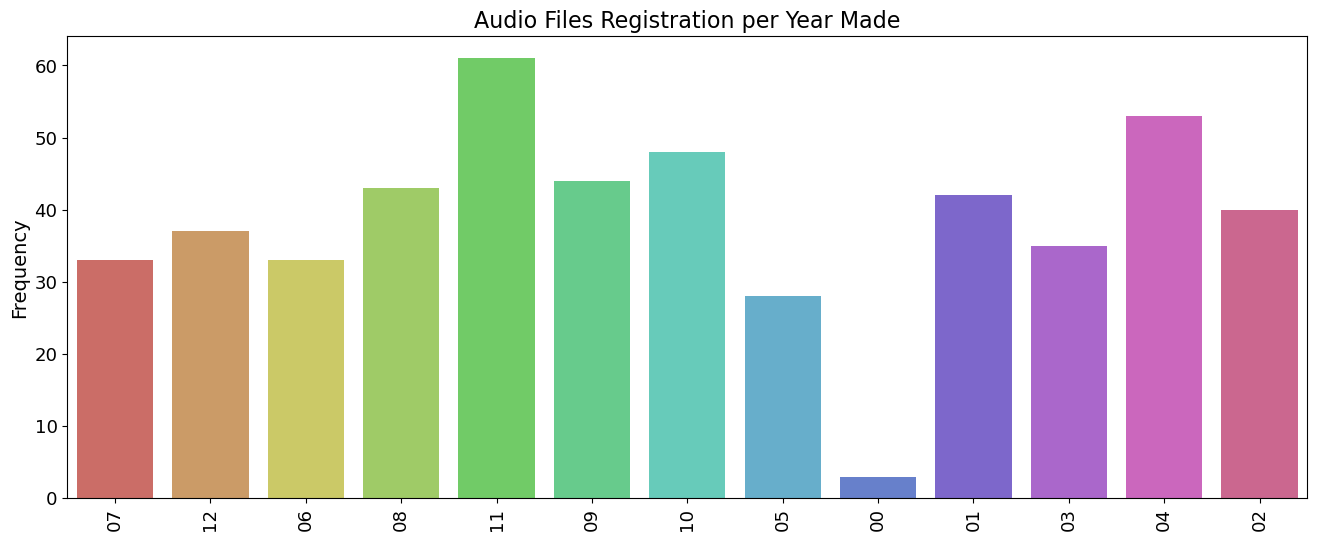

In [12]:
# crerate count plots for  audio files and the month they were created
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='month', palette="hls")

plt.title("Audio Files Registration per Year Made", fontsize=16)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("")
plt.show()

## type column
📌Note: This column is a bit messy, as the same description can be found under multiple names. Also, there can be multiple descriptions for multiple sounds (one bird song can mean a different thing from another one in the same recording). Some examples are:

alarm call is: alarm call | alarm call, call
flight call is: flight call | call, flight call etc.

In [13]:
# Create a new variable type by exploding all the values
adjusted_type = df['type'].apply(lambda x: x.split(',')).reset_index().explode("type")

# Strip off white spaces and convert to lowercase characters
adjusted_type = adjusted_type['type'].apply(lambda x: x.strip().lower()).reset_index()
adjusted_type['type'] = adjusted_type['type'].replace('calls', 'call')

In [17]:
adjusted_type['type'].unique()
adjusted_type

,index,type
0,0,call
1,0,song
2,1,song
3,2,song
4,3,call
...,...,...
566,495,song
567,496,song
568,497,song
569,498,song


### create count plots for the types of songs 

In [16]:
# Create Top 15 list with song types
top_15 = list(adjusted_type['type'].value_counts().head(15).index)

# Filter the data for only the top 15 song types
data = adjusted_type[adjusted_type['type'].isin(top_15)]

# Clean 'type' column
data['type'] = data['type'].str.replace('?', '').str.strip().str.lower()

# Plot the count plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(data['type'], palette="hls")
plt.title("Top 15 Song Types", fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("Song Type", fontsize=14)
plt.show()






/tmp/ipykernel_9211/1696750968.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['type'] = data['type'].str.replace('?', '').str.strip().str.lower()
/tmp/ipykernel_9211/1696750968.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type'] = data['type'].str.replace('?', '').str.strip().str.lower()


ValueError: could not convert string to float: 'call'

<Figure size 1200x600 with 0 Axes>

## countries from which the birds were taken
📌Note: Let's look at top 15 countries with most recordings. The majority of recordings are located in the US, followed by Canada and Mexico.

In [ ]:
# Top 15 most common elevations
top_15 = list(df['cnt'].value_counts().head(15).reset_index()['index'])
data = train_csv[train_csv['country'].isin(top_15)]

## Data preprocessing
For any audio application, it is necessary to import the data that you need to preprocess. In librosa, librosa.load can be integrated to carry on this task. Moreover, at the initial stage, it is important to extract the information of the sound file as samplig rate, duration in s etc.

In [ ]:
mating_call = os.path.join("bird_sounds", "duet_calls", "10009.mp3")
mating_call

In [ ]:
ipd.Audio(mating_call)

In [ ]:
#  getting the raw audio features
print("sampling rate: ", librosa.get_samplerate(mating_call))
print("Duration: ", librosa.get_duration(filename=mating_call))

# import the audio files
mating_signal, sampling_rate = librosa.load(mating_call, sr=44100, mono=False)

# Shape of features
print("Shape of Initial Data : "+ str(mating_signal.shape))

In [ ]:
print(mating_signal)

## DATA Visualization
 ENSURE THAT ALL FILES ARE COMPATIBLE TO THE MODEL
 

In [ ]:
alarm_call = os.path.join("bird_sounds", "alarm_calls", "2679.mp3")
mating_call = os.path.join("bird_sounds", "duet_calls", "10009.mp3")
other_call = os.path.join("bird_sounds", "other_calls", "10011.mp3")

In [ ]:
alarm_call
mating_call
other_call

In [ ]:
ipd.Audio(mating_call)

In [ ]:
ipd.Audio(other_call)

In [ ]:
ipd.Audio(alarm_call)

In [ ]:
alarm_call_y, alarm_call_sr = librosa.load(alarm_call)
print(f'y:{alarm_call_y[:10]}')
print(f'shape y:{alarm_call_y.shape}')
print(f'sr:{alarm_call_sr}')




In [ ]:
pd.Series(alarm_call_y)

In [ ]:
# plotting the numpy array of the audio
pd.Series(alarm_call_y).plot(figsize = (10, 5), lw=1,                 
                             title = "Alarm call example")
plt.show()

In [ ]:
mating_call_y, mating_call_sr = librosa.load(mating_call)
print(f'y:{mating_call_y[:10]}')
print(f'shape y:{mating_call_y.shape}')
print(f'sr:{mating_call_sr}')

In [ ]:
pd.Series(mating_call_y).plot(figsize = (20, 5), lw=1,
                 title = "mating call example")
plt.show()

In [ ]:
other_call_y, other_call_sr = librosa.load(other_call)
print(f'y:{other_call_y[:10]}')
print(f'shape y:{other_call_y.shape}')
print(f'sr:{other_call_sr}')

In [ ]:
pd.Series(other_call_y).plot(figsize = (10, 5), lw=1,
                 title = "other call example")
plt.show()

In [ ]:
pd.Series(other_call_y[3000:3500]).plot(figsize = (10, 5), lw=1,
                 title = "other call example")
plt.show()

Fast Fourier Transformation

## spectogramm

In [ ]:
D = librosa.stft(alarm_call_y)
s_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
s_db.shape

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
img = librosa.display.specshow(s_db,
                              x_axis = 'time',
                              y_axis = 'log',
                              ax= ax)

## MEL SPECTROGRAM

In [ ]:
S = librosa.feature.melspectrogram(y = alarm_call_y,
                                  sr = alarm_call_sr,
                                  n_mels = 128,
                                  )
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(s_db,
                              x_axis = 'time',
                              y_axis = 'log',
                              ax= ax)
ax.set_title('Mel spectrogram for alarm call ', fontsize = 20)